In [11]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings


In [12]:
df=pd.read_csv('E:/python/fifa.csv')
fv=pd.read_csv('E:/python/fifa_+variable_information.csv')
df.head()


,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [13]:
d= df['Release Clause'].str.replace('€','')
units= {"K":1000,"M":1000000}  # make a dict that contain the value that they represent
result=[]
for n in d:
        try:
            result.append( float(n) )  #try to comber it to a number
        except ValueError:
            unit=n[-1]                 #get the letter
            n = float( n[:-1] )        #convert all but the letter
            result.append( n * units[unit] )
df['Release Clause']=result
df['Release Clause']=df['Release Clause'].fillna(0)
df['Release Clause']=pd.to_numeric(df['Release Clause'], errors='coerce')



In [14]:
d= df['Value'].str.replace('€','')
units= {"K":1000,"M":1000000}  # make a dict that contain the value that they represent
result=[]
for n in d:
        try:
            result.append(float(n))  #try to comber it to a number
        except ValueError:
            unit=n[-1]                 #get the letter
            n = float( n[:-1] )        #convert all but the letter
            result.append( n * units[unit] )
df['Value']=result
df['Value']=df['Value'].fillna(0)
df['Value']=pd.to_numeric(df['Value'], errors='coerce')


In [15]:
d= df['Wage'].str.replace('€','')
units= {"K":1000,"M":1000000}  # make a dict that contain the value that they represent
result=[]
for n in d:
        try:
            result.append(float(n))  #try to comber it to a number
        except ValueError:
            unit=n[-1]                 #get the letter
            n = float( n[:-1] )        #convert all but the letter
            result.append( n * units[unit] )
df['Wage']=result
df['Wage']=df['Wage'].fillna(0)
df['Wage']=pd.to_numeric(df['Wage'], errors='coerce')

In [16]:
import datetime
df['Joined']=pd.DatetimeIndex(df['Joined']).year
df['Joined']=pd.to_numeric(df['Joined'], errors='coerce').astype('Int32')





In [17]:
import datetime
df['Contract Valid Until']=pd.DatetimeIndex(df['Contract Valid Until']).year
df['Contract Valid Until']=pd.to_datetime(df['Contract Valid Until'], format='%Y')



      
        

In [18]:
df['Height']=df['Height'].str.replace("'",".")
df['Height']=pd.to_numeric(df['Height'],errors='coerce')



In [19]:
df['Weight']=df['Weight'].str.replace("lbs","")
df['Weight']=pd.to_numeric(df['Weight'],errors='coerce')

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 60 columns):
ID                          18207 non-null int64
Name                        18207 non-null object
Age                         18207 non-null int64
Photo                       18207 non-null object
Nationality                 18207 non-null object
Flag                        18207 non-null object
Overall                     18207 non-null int64
Potential                   18207 non-null int64
Club                        17966 non-null object
Club Logo                   18207 non-null object
Value                       18207 non-null float64
Wage                        18207 non-null float64
Preferred Foot              18159 non-null object
International Reputation    18159 non-null float64
Weak Foot                   18159 non-null float64
Skill Moves                 18159 non-null float64
Work Rate                   18159 non-null object
Body Type                   18159 non-nu

In [21]:
df.isnull().sum()

ID                              0
Name                            0
Age                             0
Photo                           0
Nationality                     0
Flag                            0
Overall                         0
Potential                       0
Club                          241
Club Logo                       0
Value                           0
Wage                            0
Preferred Foot                 48
International Reputation       48
Weak Foot                      48
Skill Moves                    48
Work Rate                      48
Body Type                      48
Position                       60
Jersey Number                  60
Joined                       1553
Loaned From                 16943
Contract Valid Until          289
Height                         48
Weight                         48
Crossing                       48
Finishing                      48
HeadingAccuracy                48
ShortPassing                   48
Volleys       

In [22]:
df['Overall'].describe()

count    18207.000000
mean        66.238699
std          6.908930
min         46.000000
25%         62.000000
50%         66.000000
75%         71.000000
max         94.000000
Name: Overall, dtype: float64

1.	Plot the distribution of Overall rating for all players. 

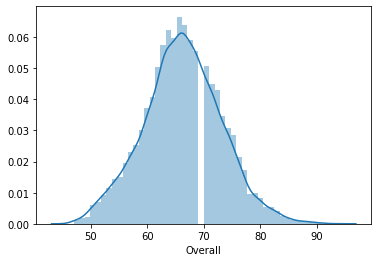

In [23]:
sns.distplot(df['Overall'])

In [24]:
len(df[df['Overall']>89])


14

2.	Generate pair plots for the following variables:
Overall, Value, Wage, International Reputation, Height, Weight, Release Clause


In [25]:
# df['Height'].describe()
df['Height']=df['Height'].fillna(df['Height'].mean())

In [26]:
df['Weight']=df['Weight'].fillna(df['Weight'].mean())

In [27]:
df['International Reputation']=df['International Reputation'].fillna(df['International Reputation'].mean())

In [28]:
df.isnull().sum()

ID                              0
Name                            0
Age                             0
Photo                           0
Nationality                     0
Flag                            0
Overall                         0
Potential                       0
Club                          241
Club Logo                       0
Value                           0
Wage                            0
Preferred Foot                 48
International Reputation        0
Weak Foot                      48
Skill Moves                    48
Work Rate                      48
Body Type                      48
Position                       60
Jersey Number                  60
Joined                       1553
Loaned From                 16943
Contract Valid Until          289
Height                          0
Weight                          0
Crossing                       48
Finishing                      48
HeadingAccuracy                48
ShortPassing                   48
Volleys       

In [29]:
col=['Overall','Value','Wage','International Reputation','Height','Weight','Release Clause']

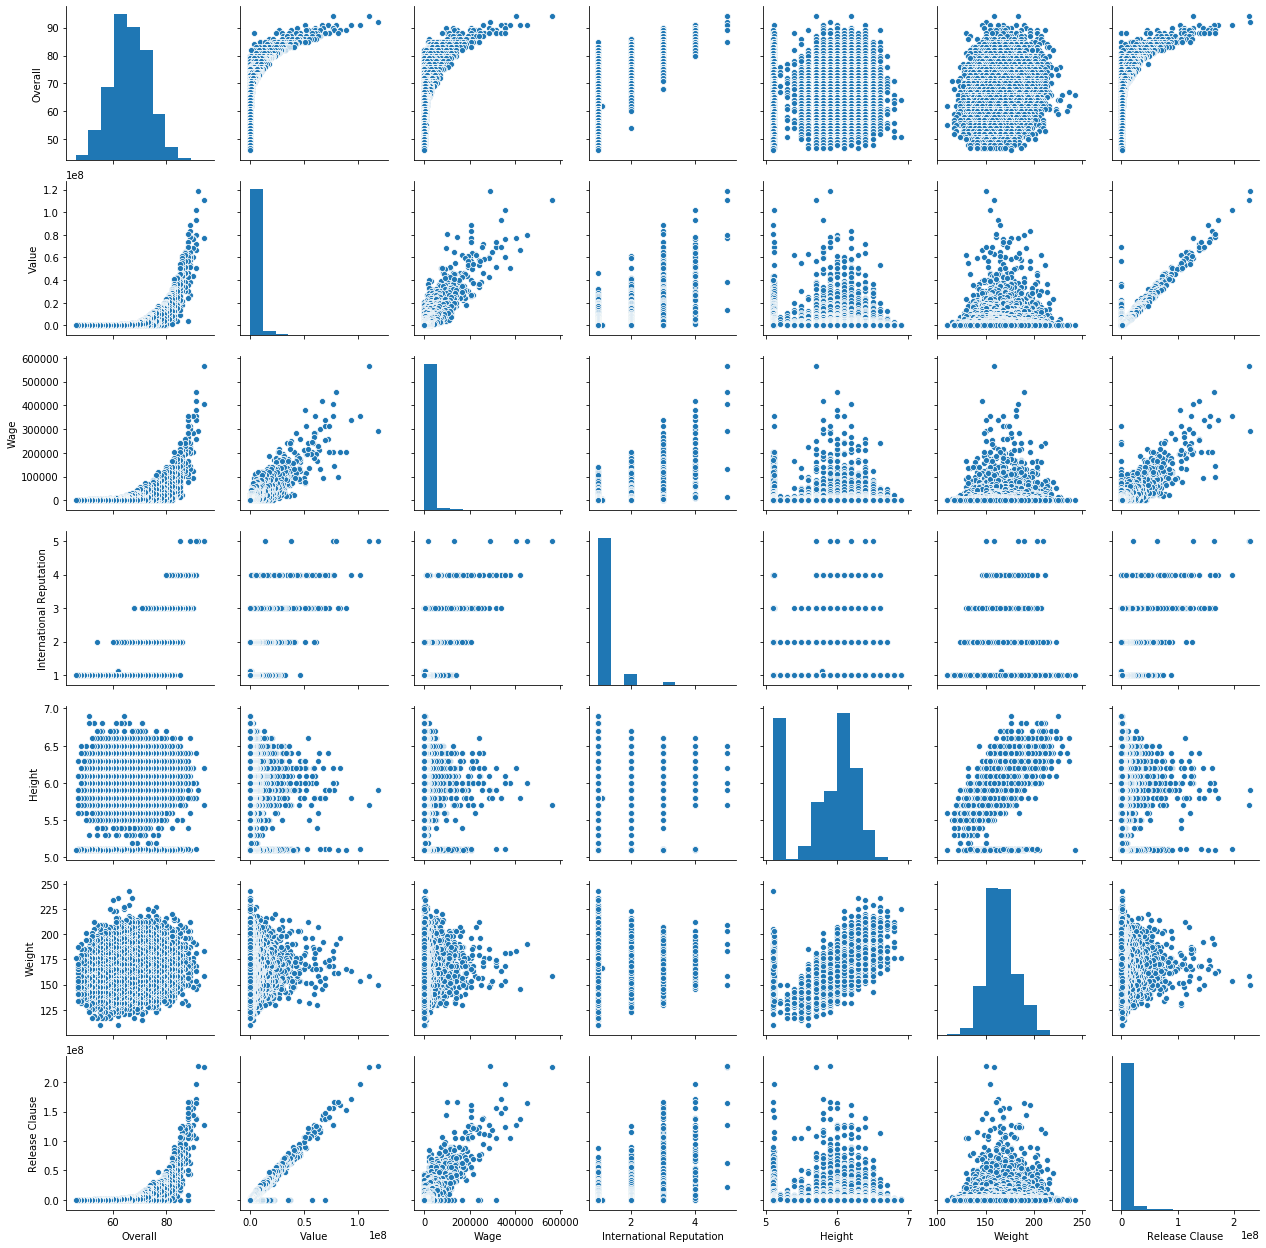

In [30]:
sns.pairplot(df[col])

3.	Generate a table containing the top 20 players ranked by Overall score and whose contract expires in 2020

In [31]:
df['Overall'].describe()

count    18207.000000
mean        66.238699
std          6.908930
min         46.000000
25%         62.000000
50%         66.000000
75%         71.000000
max         94.000000
Name: Overall, dtype: float64

In [32]:
a=df[df['Contract Valid Until']=='2020']
a

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,138600000.0
5,183277,E. Hazard,27,https://cdn.sofifa.org/players/4/19/183277.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,91,Chelsea,https://cdn.sofifa.org/teams/2/light/5.png,...,91.0,34.0,27.0,22.0,11.0,12.0,6.0,8.0,8.0,172100000.0
6,177003,L. Modrić,32,https://cdn.sofifa.org/players/4/19/177003.png,Croatia,https://cdn.sofifa.org/flags/10.png,91,91,Real Madrid,https://cdn.sofifa.org/teams/2/light/243.png,...,84.0,60.0,76.0,73.0,13.0,9.0,7.0,14.0,9.0,137400000.0
8,155862,Sergio Ramos,32,https://cdn.sofifa.org/players/4/19/155862.png,Spain,https://cdn.sofifa.org/flags/45.png,91,91,Real Madrid,https://cdn.sofifa.org/teams/2/light/243.png,...,82.0,87.0,92.0,91.0,11.0,8.0,9.0,7.0,11.0,104600000.0
13,168542,David Silva,32,https://cdn.sofifa.org/players/4/19/168542.png,Spain,https://cdn.sofifa.org/flags/45.png,90,90,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,...,93.0,59.0,53.0,29.0,6.0,15.0,7.0,6.0,12.0,111000000.0
21,179813,E. Cavani,31,https://cdn.sofifa.org/players/4/19/179813.png,Uruguay,https://cdn.sofifa.org/flags/60.png,89,89,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,...,82.0,52.0,45.0,39.0,12.0,5.0,13.0,13.0,10.0,111000000.0
24,138956,G. Chiellini,33,https://cdn.sofifa.org/players/4/19/138956.png,Italy,https://cdn.sofifa.org/flags/27.png,89,89,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,...,84.0,93.0,93.0,90.0,3.0,3.0,2.0,4.0,3.0,44600000.0
31,190460,C. Eriksen,26,https://cdn.sofifa.org/players/4/19/190460.png,Denmark,https://cdn.sofifa.org/flags/13.png,88,91,Tottenham Hotspur,https://cdn.sofifa.org/teams/2/light/18.png,...,88.0,59.0,57.0,22.0,9.0,14.0,7.0,7.0,6.0,141500000.0
39,164240,Thiago Silva,33,https://cdn.sofifa.org/players/4/19/164240.png,Brazil,https://cdn.sofifa.org/flags/54.png,88,88,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,...,81.0,88.0,89.0,85.0,9.0,12.0,5.0,9.0,10.0,44400000.0
46,193041,K. Navas,31,https://cdn.sofifa.org/players/4/19/193041.png,Costa Rica,https://cdn.sofifa.org/flags/72.png,87,87,Real Madrid,https://cdn.sofifa.org/teams/2/light/243.png,...,67.0,28.0,14.0,14.0,90.0,81.0,75.0,82.0,90.0,62500000.0


In [33]:
df1=a.head(20)
df1

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,138600000.0
5,183277,E. Hazard,27,https://cdn.sofifa.org/players/4/19/183277.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,91,Chelsea,https://cdn.sofifa.org/teams/2/light/5.png,...,91.0,34.0,27.0,22.0,11.0,12.0,6.0,8.0,8.0,172100000.0
6,177003,L. Modrić,32,https://cdn.sofifa.org/players/4/19/177003.png,Croatia,https://cdn.sofifa.org/flags/10.png,91,91,Real Madrid,https://cdn.sofifa.org/teams/2/light/243.png,...,84.0,60.0,76.0,73.0,13.0,9.0,7.0,14.0,9.0,137400000.0
8,155862,Sergio Ramos,32,https://cdn.sofifa.org/players/4/19/155862.png,Spain,https://cdn.sofifa.org/flags/45.png,91,91,Real Madrid,https://cdn.sofifa.org/teams/2/light/243.png,...,82.0,87.0,92.0,91.0,11.0,8.0,9.0,7.0,11.0,104600000.0
13,168542,David Silva,32,https://cdn.sofifa.org/players/4/19/168542.png,Spain,https://cdn.sofifa.org/flags/45.png,90,90,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,...,93.0,59.0,53.0,29.0,6.0,15.0,7.0,6.0,12.0,111000000.0
21,179813,E. Cavani,31,https://cdn.sofifa.org/players/4/19/179813.png,Uruguay,https://cdn.sofifa.org/flags/60.png,89,89,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,...,82.0,52.0,45.0,39.0,12.0,5.0,13.0,13.0,10.0,111000000.0
24,138956,G. Chiellini,33,https://cdn.sofifa.org/players/4/19/138956.png,Italy,https://cdn.sofifa.org/flags/27.png,89,89,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,...,84.0,93.0,93.0,90.0,3.0,3.0,2.0,4.0,3.0,44600000.0
31,190460,C. Eriksen,26,https://cdn.sofifa.org/players/4/19/190460.png,Denmark,https://cdn.sofifa.org/flags/13.png,88,91,Tottenham Hotspur,https://cdn.sofifa.org/teams/2/light/18.png,...,88.0,59.0,57.0,22.0,9.0,14.0,7.0,7.0,6.0,141500000.0
39,164240,Thiago Silva,33,https://cdn.sofifa.org/players/4/19/164240.png,Brazil,https://cdn.sofifa.org/flags/54.png,88,88,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,...,81.0,88.0,89.0,85.0,9.0,12.0,5.0,9.0,10.0,44400000.0
46,193041,K. Navas,31,https://cdn.sofifa.org/players/4/19/193041.png,Costa Rica,https://cdn.sofifa.org/flags/72.png,87,87,Real Madrid,https://cdn.sofifa.org/teams/2/light/243.png,...,67.0,28.0,14.0,14.0,90.0,81.0,75.0,82.0,90.0,62500000.0


a)	What would the average wage for this set of players be?

In [34]:
df1['Wage'].mean()

205150.0

b)	What is the average age?

In [35]:
df1['Age'].mean()

29.95

Is there a correlation between the Overall rating and Value for these players

In [36]:
# fig,ax=plt.subplots(figsize=(15,15))
# sns.heatmap(df1.corr(),square=True)
df['Overall'].corr(df['Value'])

0.6270852347261975

yes, there have correlation between Overall and Value

In [37]:
df['Position']=df['Position'].fillna(method='ffill')

In [38]:
df.isnull().sum()

ID                              0
Name                            0
Age                             0
Photo                           0
Nationality                     0
Flag                            0
Overall                         0
Potential                       0
Club                          241
Club Logo                       0
Value                           0
Wage                            0
Preferred Foot                 48
International Reputation        0
Weak Foot                      48
Skill Moves                    48
Work Rate                      48
Body Type                      48
Position                        0
Jersey Number                  60
Joined                       1553
Loaned From                 16943
Contract Valid Until          289
Height                          0
Weight                          0
Crossing                       48
Finishing                      48
HeadingAccuracy                48
ShortPassing                   48
Volleys       

In [39]:
df2=df.drop_duplicates(['Position'])
df2['Position']
   




# for i in df2['Position']:
#     df3=df.loc[df2['Position'] ==i].head()
#     print(df2.loc[:,('ID','Name','Overall','Wage','Position')])
    

0       RF
1       ST
2       LW
3       GK
4      RCM
5       LF
7       RS
8      RCB
11     LCM
12      CB
14     LDM
17     CAM
20     CDM
21      LS
24     LCB
25      RM
28     LAM
33      LM
35      LB
45     RDM
56      RW
67      CM
69      RB
129    RAM
271     CF
450    RWB
474    LWB
Name: Position, dtype: object

4.	Generate tables containing the top 5 players by Overall rating for each unique position.

In [40]:
unique_position_value=list(df['Position'].value_counts().index)
unique_position_value

['ST',
 'GK',
 'CB',
 'CM',
 'LB',
 'RB',
 'RM',
 'LM',
 'CAM',
 'CDM',
 'RCB',
 'LCB',
 'LCM',
 'RCM',
 'LW',
 'RW',
 'RDM',
 'LDM',
 'LS',
 'RS',
 'RWB',
 'LWB',
 'CF',
 'LAM',
 'RAM',
 'RF',
 'LF']

a)	Are there any players appearing in more than one Table. Please point out such players.

In [41]:
player_position=df.groupby(['ID'])['Position'].count()
print(list(player_position[player_position>1].index))

[]


b)	What is the average wage one can expect to pay for the top 5 in every position?



In [42]:
for i in unique_position_value:
    print(i,'\t',df[df['Position']==i].sort_values(by='Overall',ascending=False).head()['Wage'].mean())

ST 	 294000.0
GK 	 192800.0
CB 	 139600.0
CM 	 130600.0
LB 	 177200.0
RB 	 155400.0
RM 	 131400.0
LM 	 164600.0
CAM 	 174000.0
CDM 	 217000.0
RCB 	 231000.0
LCB 	 162000.0
LCM 	 184400.0
RCM 	 240800.0
LW 	 261000.0
RW 	 202000.0
RDM 	 105000.0
LDM 	 126600.0
LS 	 130200.0
RS 	 132200.0
RWB 	 44200.0
LWB 	 34200.0
CF 	 47400.0
LAM 	 81600.0
RAM 	 45400.0
RF 	 148000.0
LF 	 121200.0
